In [1]:
import numpy as np

class LinearSVM:
    def __init__(self):
        self.learning_rate = 0.1
        self.lambda_param = 0.1
        self.n_iter = 5000
        self.loss_tape = []
        self.w = None
        self.b = None

    def fit(self, X, y):
        self.w = np.zeros((X.shape[1], 1))
        self.b = 0
        y_dict = {}
        for elem in y:
            if elem not in y_dict:
                if len(y_dict) == 0:
                    y_dict[elem] = -1
                elif len(y_dict) == 1:
                    y_dict[elem] = 1
                    break
        y = np.array([y_dict[elem] for elem in y])
        if len(y.shape) == 1:
            y = np.expand_dims(y, axis=1)

        for i in range(self.n_iter):
            mask = y*(X @ self.w - self.b) < 1
            mask = mask.flatten()
            loss = self.lambda_param * np.sum(self.w**2) + np.sum(np.maximum(1-y*(X @ self.w - self.b), 0))/len(y)
            self.loss_tape.append(loss)
            dL_dw = 2*self.w*self.lambda_param - np.sum(X[mask]*y[mask])
            dL_db = y
            dL_db = np.sum(dL_db[mask])
            self.w -= self.learning_rate * dL_dw
            self.b -= self.learning_rate * dL_db

    def predict(self, X):
        return np.sign((X @ self.w - self.b).flatten())

In [3]:
from matplotlib import pyplot as plt

p1 = np.random.normal((8, 8), (2, 2), (8, 2))
p2 = np.random.normal((6, 3), (1, 1), (8, 2))
data = np.concatenate((p1, p2), axis=0)
labels = np.array([-1]*8 + [1]*8)

std = np.std(data, axis=0)
mean = np.mean(data, axis=0)
print(std, mean)
data = (data - mean) / std
plt.show()

[1.28220115 2.75137256] [7.10409809 5.27331923]


[[-1.87918776]
 [-1.87918776]] 0.9999999999999999
[-1. -1. -1. -1. -1. -1. -1. -1. -1.  1.  1.  1.  1.  1.  1.  1.]
[-1 -1 -1 -1 -1 -1 -1 -1  1  1  1  1  1  1  1  1]


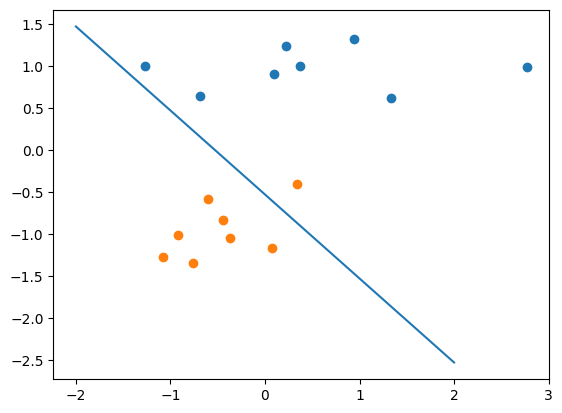

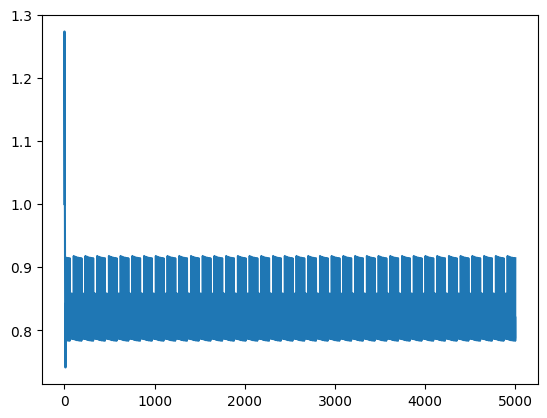

In [4]:
L = LinearSVM()
L.fit(data, labels)
print(L.w, L.b)
plt.plot(np.linspace(-2, 2, 100), L.b/L.w[1] - L.w[0] * np.linspace(-2, 2, 100)/L.w[1])
print(L.predict(data))
print(labels)

plt.scatter(data[:8, 0], data[:8, 1])
plt.scatter(data[8:, 0], data[8:, 1])
plt.show()

plt.plot(range(L.n_iter), L.loss_tape)
plt.show()